In [3]:
import torch
from transformers import HubertModel, Wav2Vec2Processor

import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

from pydub import AudioSegment
from pydub.silence import split_on_silence
import os
import subprocess

import pickle
import soundfile as sf

import speech_recognition as sr
from gtts import gTTS

In [4]:
def calculate_rms(y):
    rms = np.sqrt(np.mean(y**2))
    return rms

file = "feature/127_003_0323.flac"
file2 = "feature/after3.wav"
output_folder = "feature/"

## 16000 mono 16bit
sample_rate = 16000
n_fft = 400
hop_length = 160

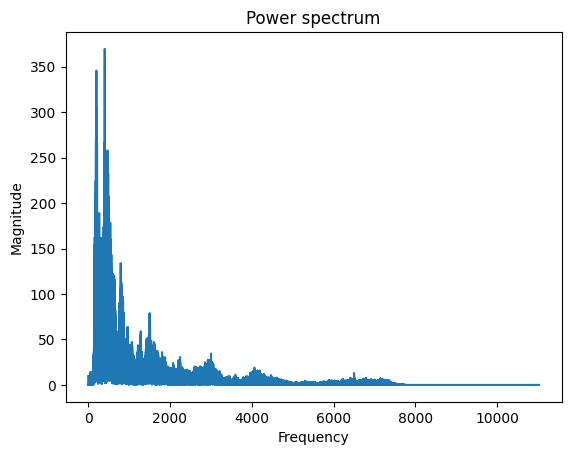

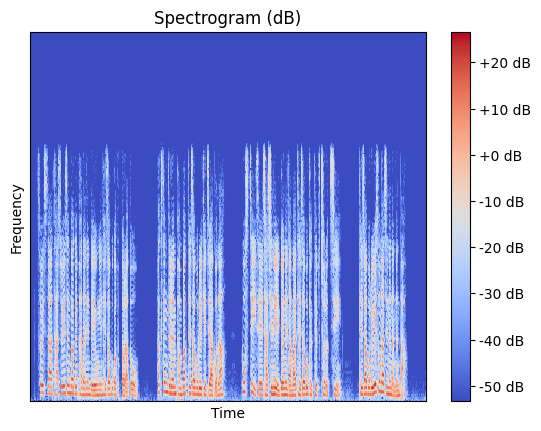

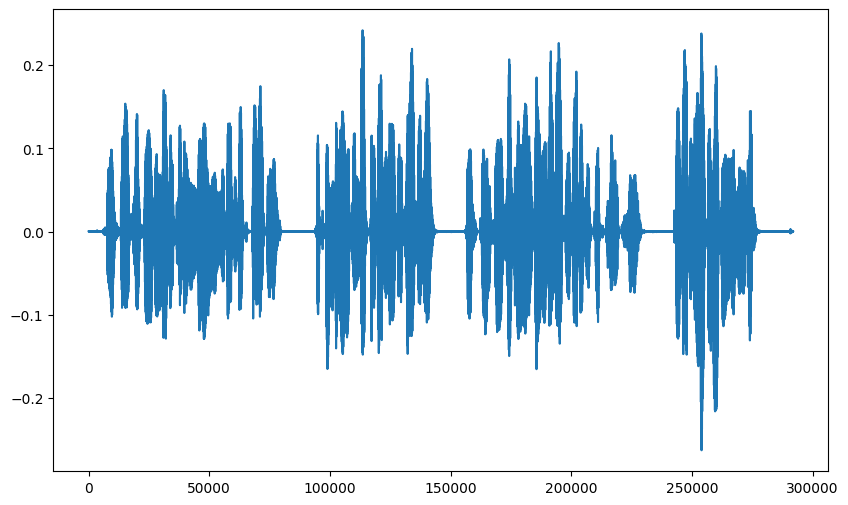

In [6]:
import librosa.display, librosa

file2 = "feature/after3.wav"
sig, sr = librosa.load(file2)

fft = np.fft.fft(sig)

magnitude = np.abs(fft) 

f = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_f = f[:int(len(magnitude) / 2)]

plt.figure()
plt.plot(left_f, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

hop_length = 128
n_fft = 512

hop_length_duration = float(hop_length) / sr
n_fft_duration = float(n_fft) / sr

stft = librosa.stft(sig, n_fft=n_fft, hop_length=hop_length)

magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure()
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

plt.figure(figsize =(10,6))
plt.plot(np.array(range(int(len(sig)))),sig)
plt.show()


In [29]:
recognizer = sr.Recognizer()

speech1, _ = sf.read(file)
print("sound1", np.shape(speech1))
print(speech1)

speech2, _ = sf.read(file2)
print("sound2", np.shape(speech2))
print(speech2)

with sr.AudioFile(file) as source:
    audio = recognizer.record(source)
try:
    text = recognizer.recognize_google(audio, language="ko-KR")
    print("인식된 텍스트: " + text)

    tts = gTTS(text=text, lang='ko')
    tts.save("feature/tts.mp3")

except sr.UnknownValueError:
    print("음성을 이해할 수 없습니다.")

minlen = min(len(speech1),len(speech2))
speech1 = speech1[:minlen]
speech2 = speech2[:minlen]

sound1 (171746,)
[ 0.00000000e+00 -3.05175781e-05 -3.05175781e-05 ... -1.22070312e-04
  1.83105469e-04 -1.22070312e-04]
sound2 (211840,)
[ 0.00000000e+00 -3.05175781e-05 -3.05175781e-05 ... -9.15527344e-05
 -9.15527344e-05 -2.13623047e-04]
인식된 텍스트: 하지만 최저임금 협상을 앞둔 시점에서 정치권이 과도한 인상 공약으로 기대심리 높여 놓는 것은 포퓰리즘에 불과하다는 지적도 나온다


In [24]:
from pydub.playback import play

recognizer = sr.Recognizer()

with sr.AudioFile(file) as source:
    audio = recognizer.record(source)

try:
    response = recognizer.recognize_google(audio, language="ko-KR", show_all=True)

    if 'alternative' in response:
        alternatives = response['alternative']
        if len(alternatives) > 0 and 'timestamps' in alternatives[0]:
            timestamps = alternatives[0]['timestamps']
            print("인식된 텍스트와 타임스탬프:", timestamps)

            # 원본 오디오 로드
            original_audio = AudioSegment.from_wav(file)

            # 각 단어를 파일로 저장
            for i, (word, start_time, end_time) in enumerate(timestamps):
                start_ms = int(start_time * 1000)  # 시작 시간 (밀리초 단위)
                end_ms = int(end_time * 1000)      # 종료 시간 (밀리초 단위)

                # 단어별 오디오 추출
                word_audio = original_audio[start_ms:end_ms]
                word_audio.export(f"feature/test/word_{i}_{word}.wav", format="wav")
                print(f"word_{i}_{word}.wav 파일이 저장되었습니다.")
        else:
            print("타임스탬프 정보가 없습니다.")
    else:
        print("인식 결과가 없습니다.")

except sr.UnknownValueError:
    print("음성을 이해할 수 없습니다.")
except sr.RequestError as e:
    print(f"Google 음성 인식 서비스에 요청할 수 없습니다; {e}")


타임스탬프 정보가 없습니다.


In [4]:
import soundfile as sf
import numpy as np
from transformers import HubertModel, Wav2Vec2Processor
import math
import librosa, librosa.display


processor = Wav2Vec2Processor.from_pretrained("kresnik/wav2vec2-large-xlsr-korean")
model = HubertModel.from_pretrained("team-lucid/hubert-large-korean")

file = "feature/작고 똑바른/bef2.wav"
file2 = "feature/작고 똑바른/aft2.wav"
#file3 = "
#file2 = "feature/작고 똑바른/aft1.wav"
file3 = "feature/after33.wav"
#file2 = "feature/test/fea_t1.wav"

speech1, _ = sf.read(file)
print("sound1", np.shape(speech1))

speech2, _ = sf.read(file2)
print("sound2", np.shape(speech2))

speech3, _ = sf.read(file3)
print("sound2", np.shape(speech3))

minlen = min(len(speech1),len(speech2))
speech1 = speech1[:minlen]
speech2 = speech2[:minlen]
speech3 = speech3[:minlen]

input1 = processor(speech1, return_tensors="pt").input_values
outputs1 = model(input1)

input2 = processor(speech2, return_tensors="pt").input_values
outputs2 = model(input2)

input3 = processor(speech3, return_tensors="pt").input_values
outputs3 = model(input3)

# Input [1, 16000]
print(f"Output:  {outputs1.last_hidden_state.shape}")  # [1, 49, 768]
print(f"Output:  {outputs2.last_hidden_state.shape}")  # [1, 49, 768]
print(f"Output:  {outputs3.last_hidden_state.shape}")  # [1, 49, 768]
print("1",outputs1)
print("2,",outputs2)


o1 = outputs1.last_hidden_state.detach().numpy()
o2 = outputs2.last_hidden_state.detach().numpy()
o3 = outputs3.last_hidden_state.detach().numpy()

befnp = o1[0]
aftnp = o2[0]

audio, sr = librosa.load(file, sr=16000)
audio2, sr = librosa.load(file2, sr=16000)
audio3, sr = librosa.load(file3, sr=16000)
mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
mfcc2 = librosa.feature.mfcc(audio2, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
mfcc3 = librosa.feature.mfcc(audio3, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)

print(np.shape(mfcc), np.shape(mfcc2))
minlen = min(len(mfcc[0]),len(mfcc2[0]))
mfcc = mfcc[:,:minlen]
mfcc2 = mfcc2[:,:minlen]
mfcc3 = mfcc3[:,:minlen]



def difference(befnp, aftnp, type) :
    eculidean = np.linalg.norm(befnp - aftnp)
    sflat1 = befnp.flatten()
    sflat2 = aftnp.flatten()

    cosine_similarty = np.dot(sflat1, sflat2) / np.linalg.norm(sflat1) * np.linalg.norm(sflat2)

    diff = befnp - aftnp
    meand = np.mean(diff)
    stdd = np.std(diff)

    if type == 0:
        print("Eculidean : ", eculidean, "/root:", eculidean/math.sqrt(len(befnp)) )
    else :
        print("Eculidean : ", eculidean, "/root:", eculidean/math.sqrt(len(befnp[0])) )
    print("Cosine : ", cosine_similarty)
    print("Mean, STD : ", meand, stdd)

difference(o1[0], o2[0],0)
#difference(o1[0], o3[0], 0)

difference(mfcc, mfcc2,1)
difference(mfcc, mfcc3,1)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


sound1 (148001,)
sound2 (147840,)
sound2 (211840,)


It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.
It is strongly recommended to pass the ``sampling_rate`` argument to this function. Failing to do so can result in silent errors that might be hard to debug.


Output:  torch.Size([1, 461, 1024])
Output:  torch.Size([1, 461, 1024])
Output:  torch.Size([1, 461, 1024])
1 BaseModelOutput(last_hidden_state=tensor([[[-1.4136, -2.2414, -0.9091,  ..., -0.1818,  0.7393, -2.1579],
         [-1.6118, -2.2555, -0.9201,  ..., -0.1228,  0.0740, -1.8602],
         [-1.1890, -1.8960, -1.6105,  ..., -0.9875, -0.7014, -2.3039],
         ...,
         [-0.8495, -0.6690, -2.1087,  ...,  0.2928,  2.0659, -0.2323],
         [-0.8132, -0.6965, -2.1749,  ...,  0.1737,  2.1909, -0.2707],
         [-0.6815, -0.6286, -2.1533,  ..., -0.2058,  2.4577, -0.5031]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=None)
2, BaseModelOutput(last_hidden_state=tensor([[[-1.3518, -2.1635, -1.3201,  ..., -0.6857, -0.3139, -1.8687],
         [-1.2209, -2.2559, -1.3245,  ..., -0.8461, -0.4552, -1.9020],
         [-1.2428, -2.3261, -1.6046,  ..., -1.3701, -0.8554, -2.4270],
         ...,
         [-0.4564, -0.8890, -2.8403,  ...,  0.3479,  1.5273,  0.2289]

C:\Users\User\AppData\Local\Temp\ipykernel_41804\1372303911.py:59: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 6.1035156e-05 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(audio, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
C:\Users\User\AppData\Local\Temp\ipykernel_41804\1372303911.py:60: FutureWarning: Pass y=[-6.1035156e-05 -9.1552734e-05 -9.1552734e-05 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc2 = librosa.feature.mfcc(audio2, sr=16000, n_mfcc=100, n_fft=400, hop_length=160)
C:\Users\User\AppData\Local\Temp\ipykernel_41804\1372303911.py:61: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  6.1035156e-05 ... -2.7465820e-04
 -1.2207031e-04 -1.2207031e-04] as keyword args. From version 0.10 passing these as positional arguments will re

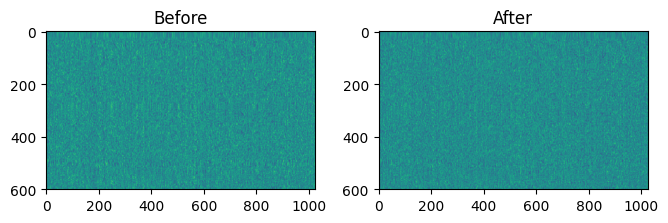

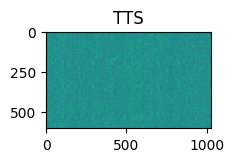

In [30]:
import matplotlib.pyplot as plt

o1 = outputs1.last_hidden_state.detach().numpy()
o2 = outputs2.last_hidden_state.detach().numpy()
o3 = outputs3.last_hidden_state.detach().numpy()

plt.figure(figsize =(10,6))
plt.subplot(1,3,1)
plt.imshow(o1[0])
plt.title("Before")

plt.subplot(1,3,2)
plt.imshow(o2[0])
plt.title("After")
plt.tight_layout()
plt.show()

plt.subplot(1,3,3)
plt.imshow(o3[0])
plt.title("TTS")
plt.tight_layout()
plt.show()